In [1]:
# !/usr/bin/env python

# [Future imports]
# "print" function compatibility between Python 2.x and 3.x
from __future__ import print_function
# Use Python 3.x "/" for division in Pyhton 2.x
from __future__ import division

# General Python
import sys
import os
sys.path.append('./')
# Data structures
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
dpi = 200
mpl.rc("savefig", dpi=dpi)
%matplotlib inline
from scipy import stats
from scipy import interpolate

import seaborn as sns
import random
from collections import Counter
import matplotlib as mpl

import pandas as pd

import timeit


In [3]:
from tqdm import tqdm

## 1. Simulate libraries of 50, 500, 5000 mutants, at single mutant frequencies of 0.1-1 (Fig 4A)

In [165]:
numReps=100
successPercents=[0.1,0.25,0.5,0.75,1]
num_mutants=[50,500,5000]
num_draws=[500,5000,50000]
sim_results = []

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = 10*mutant_count
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

            output_results = {'percent': percent,
                              'target_mutant_count': mutant_count,
                              'num_draws': i, 
                              'median_unique_mutants': np.median(num_unique_mutants), 
                              'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                              'upper_CI':np.quantile(num_unique_mutants, 0.975)
                             }
            #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
            sim_results.append(output_results)

100%|██████████| 5/5 [7:18:04<00:00, 5256.90s/it]  


In [166]:
sim_results_df=pd.DataFrame(sim_results)

In [178]:

#export simulation results for 100 replicates to load again later
#sim_results_df.to_csv('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies_100reps.csv')

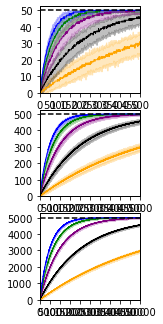

In [196]:
##Make simulation plots containing confidence interval bands
plt.rcParams['axes.linewidth'] = 1 #set the value globally

#specify which target mutant count to plot
mutant_totals=[50,500,5000]

#list single mutant frequencies simulated
percent_list=[0.1,0.25,0.5, 0.75, 1.0]

#colors & labels for each single mutant frequency
colors=['orange','black','purple','green','blue']
labels=['0.10','0.25','0.50','0.75','1.00']

#make fig, ax
fig, ax = plt.subplots(3,figsize=(1.8,5.4))

for index, val in enumerate(mutant_totals):
    current_ax=plt.subplot(3,1,index+1)
    total_mutants=val
    
    #for larger simulations, reduce number of plotted points to allow easier manipulation of plots outside of pythong
    if val > 50:
        
        #want to keep all simulations to 500 plotted points, so define bins for different number of draws below
        bins=int(val/val)
        
        
        #slice all arrays below to select every nth element only, defined by bins above
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df.loc[(sim_results_df['percent'] == i) & (sim_results_df['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=(data_select['num_draws'].to_numpy())[::bins]

            #get list of median unique mutants
            medians = (data_select['median_unique_mutants'].to_numpy())[::bins]

            #get list of lower CI values
            lowers = (data_select['lower_CI'].to_numpy())[::bins]

            #get list of upper CI values
            uppers = (data_select['upper_CI'].to_numpy())[::bins]

            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h], rasterized=True)
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid', rasterized=True)
    else:
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df.loc[(sim_results_df['percent'] == i) & (sim_results_df['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=data_select['num_draws'].to_numpy()

            #get list of median unique mutants
            medians = data_select['median_unique_mutants'].to_numpy()

            #get list of lower CI values
            lowers = data_select['lower_CI'].to_numpy()

            #get list of upper CI values
            uppers = data_select['upper_CI'].to_numpy()


            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h])
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid')

    current_ax.axhline(total_mutants, color ='black', linestyle='--')
    plt.xlim(0,total_mutants*10)
    plt.ylim(0,total_mutants+(total_mutants*0.05))
    plt.locator_params(nbins=10)

plt.subplots_adjust(hspace=0.2)

fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies.png')
fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_A_picking_with_efficiencies.pdf', dpi=400)

### Simulate picking for entire SpAP library

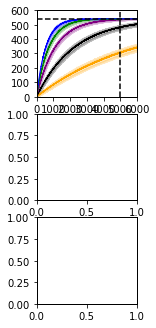

In [219]:
##Make simulation plots containing confidence interval bands
plt.rcParams['axes.linewidth'] = 1 #set the value globally

#specify which target mutant count to plot
mutant_totals=[541]

#list single mutant frequencies simulated
percent_list=[0.1,0.25,0.5, 0.75, 1.0]

#colors & labels for each single mutant frequency
colors=['orange','black','purple','green','blue']
labels=['0.10','0.25','0.50','0.75','1.00']

#make fig, ax
fig, ax = plt.subplots(3,figsize=(1.8,5.4))

for index, val in enumerate(mutant_totals):
    current_ax=plt.subplot(3,1,index+1)
    total_mutants=val
    
    #for larger simulations, reduce number of plotted points to allow easier manipulation of plots outside of python
    if val > 50:
        
        #want to keep all simulations to 500 plotted points, so define bins for different number of draws below
        bins=int(val/val)
        
        
        #slice all arrays below to select every nth element only, defined by bins above
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df_SpAP.loc[(sim_results_df_SpAP['percent'] == i) & (sim_results_df_SpAP['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=(data_select['num_draws'].to_numpy())[::bins]

            #get list of median unique mutants
            medians = (data_select['median_unique_mutants'].to_numpy())[::bins]

            #get list of lower CI values
            lowers = (data_select['lower_CI'].to_numpy())[::bins]

            #get list of upper CI values
            uppers = (data_select['upper_CI'].to_numpy())[::bins]

            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h], rasterized=True)
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid', rasterized=True)
    else:
        for h, i in enumerate(percent_list):
            #select rows of dataframe containing only single mutant frequency (percent)
            #and target_mutant_count
            data_select= sim_results_df_SpAP.loc[(sim_results_df_SpAP['percent'] == i) & (sim_results_df_SpAP['target_mutant_count'] == total_mutants)]

            #get list of number of draws
            draws=data_select['num_draws'].to_numpy()

            #get list of median unique mutants
            medians = data_select['median_unique_mutants'].to_numpy()

            #get list of lower CI values
            lowers = data_select['lower_CI'].to_numpy()

            #get list of upper CI values
            uppers = data_select['upper_CI'].to_numpy()


            current_ax.plot(draws, medians, '-o', marker="None",linewidth=1, color=colors[h])
            current_ax.fill_between(draws, medians-(medians - lowers), medians+(uppers - medians), color=colors[h],alpha=0.25, step='mid')

    current_ax.axhline(total_mutants, color ='black', linestyle='--')
    current_ax.axvline(4992, color ='black', linestyle='--')

    plt.xlim(0,6000)
    plt.ylim(0,600)
    plt.locator_params(nbins=10)

plt.subplots_adjust(hspace=0.2)

fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_B_picking_with_efficiencies.png')
fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_B_picking_with_efficiencies.pdf', dpi=400)

## Create simulations defining the expected unique yield for each sublibrary

In [378]:
numReps=1000
successPercents=[0.5]
num_mutants=[50]
num_draws=[384] 
sim_results = []

mutant_yield=[]

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

            output_results = {'percent': percent,
                              'target_mutant_count': mutant_count,
                              'num_draws': i, 
                              'median_unique_mutants': np.median(num_unique_mutants), 
                              'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                              'upper_CI':np.quantile(num_unique_mutants, 0.975)
                             }
            #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
            sim_results.append(output_results)
            
            #When 384 draws are reached for each replicate, add number of unique mutants to a list for a histogram
            
            if i == rangeDraws[-1]:
                mutant_yield.append(num_unique_mutants)
            
            
sim_results_df_SpAP=pd.DataFrame(sim_results)

100%|██████████| 1/1 [00:08<00:00,  8.96s/it]


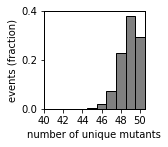

In [379]:
#plot histogram, 1000 events =1000
plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, ax = plt.subplots(1,figsize=(1.8,1.8))
plt.hist(mutant_yield, bins=np.arange(-39.5, 51.5, 1), color = 'gray', rwidth=1, edgecolor='black', density=True)
plt.xlim(40,50.5)
plt.xticks(np.arange(40, 52, step=2));
# plt.yticks(0,0.25)
plt.xlabel('number of unique mutants');
plt.ylabel('events (fraction)');
plt.show()

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_C_var_per_384_run_pt5_1000reps.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_C_var_per_384_run_pt5_1000reps.pdf')

## Fig 4E, expected number of variants per position, a 50 AA window sampled 384 draws at 0.5 efficiency, 1000 replicates --REDO

In [375]:
numReps=1000
successPercents=[0.5]
num_mutants=[50]
num_draws=[384] 
sim_results = []

mutant_yield=[]
unique_mutants = []

for percent in tqdm(successPercents):
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]

        #Make numpy array containing random percents
        #make number of arrays (equal to number of reps) of length equal to numsber of draws
        successPercent = np.random.randint(1, 101, (numReps, numWellsSequenced), dtype=int) 

        target_mutants = successPercent<(percent*100)


        unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=True) for num_mutants in np.sum(target_mutants, 1)]

        num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]

        output_results = {'percent': percent,
                          'target_mutant_count': mutant_count,
                          'num_draws': i, 
                          'median_unique_mutants': np.median(num_unique_mutants), 
                          'lower_CI':np.quantile(num_unique_mutants, 0.025), 
                          'upper_CI':np.quantile(num_unique_mutants, 0.975)
                         }
        #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
        sim_results.append(output_results)

        #When 384 draws are reached for each replicate, add number of unique mutants to a list for a histogram


        mutant_yield.append(num_unique_mutants)

            
sim_results_df_SpAP=pd.DataFrame(sim_results)

100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


In [376]:
sim_results_df_SpAP

,percent,target_mutant_count,num_draws,median_unique_mutants,lower_CI,upper_CI
0,0.5,50,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2.0,2.0,2.0


50000


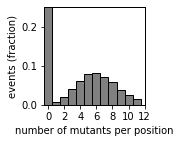

In [373]:
list_of_freqs=[]
for i, j in unique_mutants:
    freqs=list(j)
    if len(freqs) < 50:
        freqs_zero= [*freqs, *((50-len(freqs))*[0])]
    list_of_freqs.extend(freqs_zero)

print(len(list_of_freqs))
#plot histogram, 1000 events =1000
plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, ax = plt.subplots(1,figsize=(1.8,1.8))
plt.hist(list_of_freqs, bins=np.arange(-0.5, 12, 1), color = 'gray', rwidth=1, edgecolor='black', density=True)
plt.xlim(-0.5,12)
plt.ylim(0,0.25)
plt.xticks(np.arange(0, 14, step=2));
# plt.yticks(np.arange(0, 1250, step=250));
plt.xlabel('number of mutants per position');
plt.ylabel('events (fraction)');

plt.show()

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.pdf')

## Fig 4D, expected number of variants per position, a 50 AA window sampled 384 draws at 0.5 efficiency, show 5 sample runs --REDO

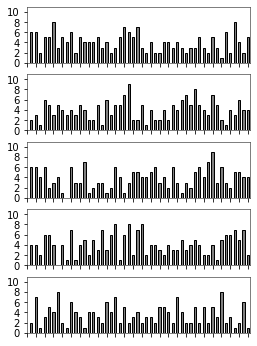

In [553]:
# here is where the user can input the number of mutants
# and the number of wells to sequence
numMutsWanted = 50
numWellsSequenced = 384
efficiency=50

# create a list with each position
mutA = np.arange(1,numMutsWanted+1)
rangeDraws = np.arange(1,numWellsSequenced+1)

numPlots=np.arange(0,5)

fig, ax = plt.subplots(nrows=5,ncols=1, sharex=True,figsize=(4,6))
plt.rcParams['axes.linewidth'] = 0.5 #set the value globally



for i in numPlots:
    current_ax=plt.subplot(5,1,i+1)
    # create a list to hold the number of unique mutants we get each time we run the simulation
    chosenMut = []
    
    for a in rangeDraws:
    # let's simulate a step where we only get a mutant 60 percent of the time!
        successPercent = random.choice(percentA)
        if successPercent <= efficiency:
            chosenMut.append(random.choice(mutA))
        else:
            pass

    countedMuts=np.unique(chosenMut, return_counts=True)
    current_ax.bar(countedMuts[0], countedMuts[1], width=0.5,color='gray', edgecolor='black')
    
    plt.xlim(0,50.5, 5)
    plt.ylim(0,11)
    plt.xticks(np.arange(0, 51, step=2));
    plt.yticks(np.arange(0, 12, step=2));
    current_ax.xaxis.set_ticklabels([])
plt.subplots_adjust(hspace=0.2)
plt.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_D_bar_chart_positions.png')
plt.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_D_bar_chart_positions.pdf')
plt.show()

# ______________________________________________
## 2. Create simulations matching experimental outcomes (per sublibary). 
-Inputs: # of desired mutants, # of picks, fraction of intended single mutants, # of observed single mutants 

In [56]:
#specify experimental results

#list of sublibrary plates
sublibL=np.arange(1,14)

#list of desired mutants (ie total possible for each sublibrary)
totalsL=[40,48,48,48,47,47,47,30,46,46,43,26,25]

#number of picks (this is barcodes meeting depth threshold, >1 read at all positions, and >=10 reads at >=95% of positions)
picksL= [318, 274, 298, 247, 315, 264, 241, 146, 260, 352, 329, 216, 270]

#single mutant frequencies per sublibrary
obsFreqL= [0.55, 0.54, 0.54, 0.53, 0.54, 0.52, 0.56, 0.62, 0.55, 0.58, 0.68, 0.56, 0.59]

#observed unique single mutants per sublibrary (no depth or var:WT read threshold applied for variant calling, just overall depth of that BC as above)
uniqueYieldL= [37, 46, 47, 45, 46, 44, 41, 27, 40, 43, 42, 25, 24]


#add these lists to dictionary
exptParamsD={}

for sublibrary in sublibL:
    
    #subtract 1 from plate number to get corresponding list index for other experimental parameters
    listIndexer = sublibrary-1
    
    #create dict entry for plate
    exptParamsD[sublibrary]={}
    
    #add experimental parameters
    exptParamsD[sublibrary]['total']=totalsL[listIndexer]
    exptParamsD[sublibrary]['picks']=picksL[listIndexer]
    exptParamsD[sublibrary]['single_freq']=obsFreqL[listIndexer]
    exptParamsD[sublibrary]['unique_yield']=uniqueYieldL[listIndexer]
    
exptParamsD

{1: {'total': 40, 'picks': 318, 'single_freq': 0.55, 'unique_yield': 37},
 2: {'total': 48, 'picks': 274, 'single_freq': 0.54, 'unique_yield': 46},
 3: {'total': 48, 'picks': 298, 'single_freq': 0.54, 'unique_yield': 47},
 4: {'total': 48, 'picks': 247, 'single_freq': 0.53, 'unique_yield': 45},
 5: {'total': 47, 'picks': 315, 'single_freq': 0.54, 'unique_yield': 46},
 6: {'total': 47, 'picks': 264, 'single_freq': 0.52, 'unique_yield': 44},
 7: {'total': 47, 'picks': 241, 'single_freq': 0.56, 'unique_yield': 41},
 8: {'total': 30, 'picks': 146, 'single_freq': 0.62, 'unique_yield': 27},
 9: {'total': 46, 'picks': 260, 'single_freq': 0.55, 'unique_yield': 40},
 10: {'total': 46, 'picks': 352, 'single_freq': 0.58, 'unique_yield': 43},
 11: {'total': 43, 'picks': 329, 'single_freq': 0.68, 'unique_yield': 42},
 12: {'total': 26, 'picks': 216, 'single_freq': 0.56, 'unique_yield': 25},
 13: {'total': 25, 'picks': 270, 'single_freq': 0.59, 'unique_yield': 24}}

In [133]:
numReps=1000
sim_results = []

for key, val in tqdm(exptParamsD.items()):
    num_draws= [val['picks']]
    num_mutants= [val['total']]
    percent= val['single_freq']
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        for i in rangeDraws:

            #Make numpy array containing random percents
            #make number of arrays (equal to number of reps) of length equal to numsber of draws
            successPercent = np.random.randint(1, 101, (numReps, i), dtype=int) 

            target_mutants = successPercent<(percent*100)


            unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=False).tolist() for num_mutants in np.sum(target_mutants, 1).tolist()]
            num_unique_mutants = [len(mut_list) for mut_list in unique_mutants]
            
            
            #calculate median expected unique mutant yield
            medianYield= int(np.median(num_unique_mutants))
            
            #calculate upper and lower bounds for 95% confidence interval
            CI_lower= int(np.quantile(num_unique_mutants, 0.025))
            CI_upper= int(np.quantile(num_unique_mutants, 0.975))

            #in this case, only store the yield output from reach replicate for the final draw
            #therefore, obtaining expected yield each time for the exact number of picks
            if i == rangeDraws[-1]:
                output_results = {'number_of_BCs': i,
                                  'single_fraction': percent,
                                  'total_possible': mutant_count,
                                  'unique_observed':uniqueYieldL[key-1],
                                  'median_unique_expected': medianYield, 
                                  'lower_CI':CI_lower, 
                                  'upper_CI':CI_upper,
                                  'formatted_95%CI':str(medianYield)+" ("+str(CI_lower)+"-"+str(CI_upper)+")"
                                 }
                #List of number of unique mutants for each replicate of 500 draws, 100 reps in this case
                sim_results.append(output_results)
            else:
                pass
sim_results_df_SpAP=pd.DataFrame(sim_results)
sim_results_df_SpAP['sublibrary']=sublibL
sim_results_df_SpAP.set_index('sublibrary', inplace=True)

100%|██████████| 13/13 [00:00<00:00, 13.85it/s]


In [123]:
## export this DF
# sim_results_df_SpAP.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/simulation_eval/csv_files/20210614_plates_1-13_obs_vs_expected_stats_1000reps.csv')

25400


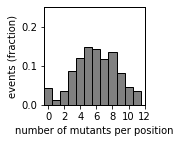

In [125]:
list_of_freqs=[]
for i, j in unique_mutants:
    freqs=list(j)
    if len(freqs) < 25:
        freqs_zero= [*freqs, *((25-len(freqs))*[0])]
    list_of_freqs.extend(freqs_zero)

print(len(list_of_freqs))
#plot histogram, 1000 events =1000
plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, ax = plt.subplots(1,figsize=(1.8,1.8))
plt.hist(list_of_freqs, bins=np.arange(-0.5, 12, 1), color = 'gray', rwidth=1, edgecolor='black', density=True)
plt.xlim(-0.5,12)
plt.ylim(0,0.25)
plt.xticks(np.arange(0, 14, step=2));
# plt.yticks(np.arange(0, 1250, step=250));
plt.xlabel('number of mutants per position');
plt.ylabel('events (fraction)');

plt.show()

# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.png')
# fig.savefig('/Users/mja/Appel_MutSequencing/2021_simulations/20210523/Fig4_E_var_per_pos_run_pt5_1000_reps.pdf')

In [84]:
sim_results_df_SpAP.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/simulation_eval/csv_files/20210614_plates_1-13_obs_vs_expected_stats_1000reps.csv')

### Import csv containing per-sublibrary per-position frequencies

In [91]:
observedFreqsDF=pd.read_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/mutant_calling/csv_files/singles_total_per_position/20210615_plates_1-13_singles_per_pos_2-542.csv', 
                            index_col='position')

In [348]:
numReps=1000
sim_results = []
yieldsD={}

for key, val in tqdm(exptParamsD.items()):
    num_draws= [val['picks']]
    num_mutants= [val['total']]
    percent= val['single_freq']
    
    for mutant_count in num_mutants:
        numWellsSequenced = num_draws[0]
        rangeDraws = np.arange(1,numWellsSequenced+1,1)

        #Make numpy array containing random percents
        #make number of arrays (equal to number of reps) of length equal to number of draws
        successPercent = np.random.randint(1, 101, (numReps, numWellsSequenced), dtype=int) 

        #select only picks below single mutant frequency (the rest are undesired picks)
        target_mutants = successPercent<(percent*100)
        
        #construct array
        unique_mutants = [np.unique(np.random.randint(0, mutant_count, num_mutants), return_counts=True) for num_mutants in np.sum(target_mutants, 1)]
    
    #create list to append counts at each position for each simulation replicate for this sublibrary
    freqL_total=[]
    
    for i in np.arange(0,numReps):
        #get list of counts
        freqL=unique_mutants[i][1]
        
        #add number of zeros to account for any positions that were observed 0 times
        if len(freqL) < num_mutants[0]:
            freqs_zero= np.array([*freqL, *((num_mutants[0]-len(freqL))*[0])])
            #add to list containing lists of counts for all replicates
            freqL_total.append(freqs_zero)
        else:
            freqL_total.append(freqL)
        
    #concatenate list of arrays (final length = number of replicates * length of sublibrary) to dict entry for this sublibrary
    yieldsD[key]=np.concatenate(freqL_total)

100%|██████████| 13/13 [00:00<00:00, 16.83it/s]


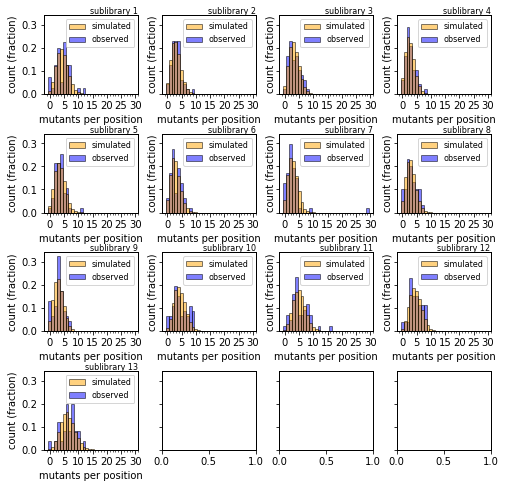

In [372]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sublibaryNumL=np.arange(1,14)

plt.rcParams['axes.linewidth'] = 1 #set the value globally
fig, axs = plt.subplots(4,4,figsize=(8,8), sharex=False, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.25)

for i in sublibaryNumL:
    currentax = axs[(i-1)//4, (i-1)%4]
    
    #plot expected distribution from 1000 replicates
    currentax.hist(yieldsD[i], bins=np.arange(-0.5, 30.5,1), density=True, alpha=0.5, facecolor='orange', edgecolor='k', zorder=2, label='simulated')
#     print(np.median(yieldsD[i]))
#     print(stats.skew(yieldsD[i], axis=0, bias=True, nan_policy='propagate'))
    
    #plot experimental distribution
    DFindex=str(i) #convert to string to reference column names in dataframe
    tempDF=observedFreqsDF.loc[observedFreqsDF[DFindex] >= 0] #selects only for rows that are floats, NaN from positions within other sublibraries are excluded
    posL=tempDF.index.tolist() #get list of all positions in this sublibrary
    countsL=tempDF[DFindex].tolist() #get list of counts for all positions
    
    #make histogram for observed counts
    currentax.hist(countsL, bins = np.arange(-0.5,30.5,1), color='blue',edgecolor='k', alpha=0.5, density=True, label='observed')
#     print("____________________")
#     print(np.median(countsL))
#     print(stats.skew(countsL, axis=0, bias=True, nan_policy='propagate'))
#     print("____________________")

    #adjust histogram appearance
    currentax.set_xticks(np.arange(0,35,5))
    currentax.xaxis.set_minor_locator(AutoMinorLocator(5))
    currentax.set_xlabel('mutants per position')
    currentax.set_ylabel('count (fraction)')
    currentax.set_yticks(np.arange(0,0.35,0.10))
    currentax.legend(fontsize=8, loc='upper right')

    
    #label
    currentax.annotate("sublibrary "+str(i), xy=(1, 1.1), 
                       xycoords='axes fraction', 
                       fontsize=8,
                       horizontalalignment='right', 
                       verticalalignment='top')
    
    
#savefig
fig.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/comparison_with_simulations/sublibary_distributions/20210701_plates_1-13_obs_vs_pred_1000_reps.png')
fig.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/comparison_with_simulations/sublibary_distributions/20210701_plates_1-13_obs_vs_pred_1000_reps.pdf')

0.5611484781813366


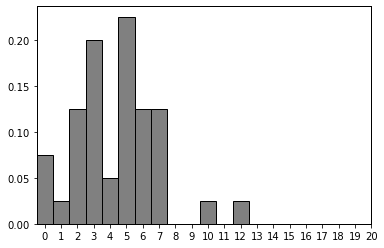

0.8652164663727604


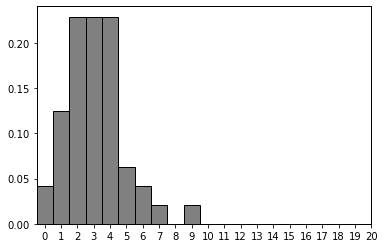

0.48830901600061977


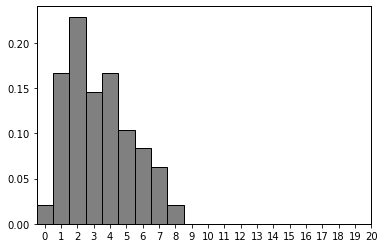

0.763560846720106


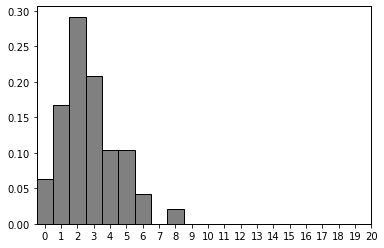

1.2196023486381757


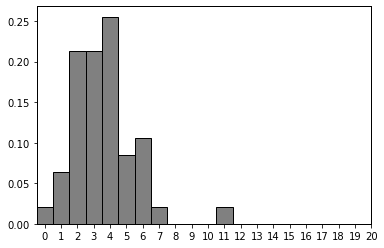

0.47147094436532383


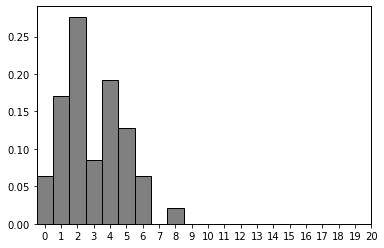

5.217495587299972


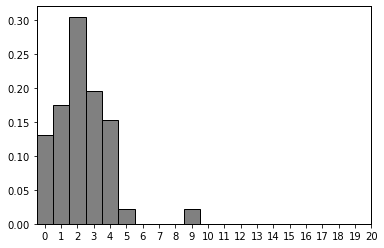

0.25721364688093024


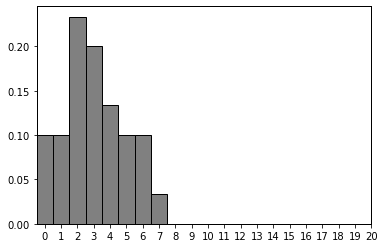

0.0636939413706356


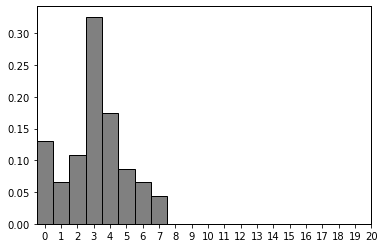

0.22507396888489942


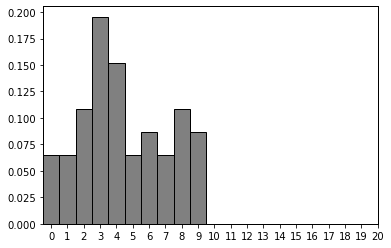

1.063225982290583


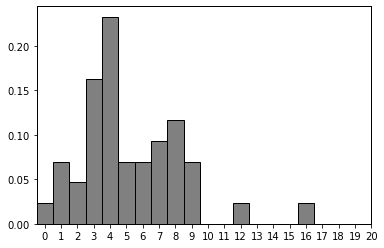

-0.09978147465304292


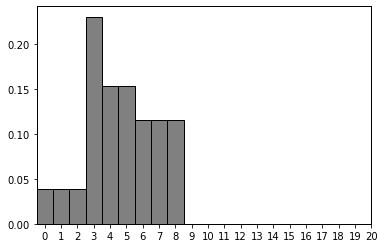

-0.2622546869808326


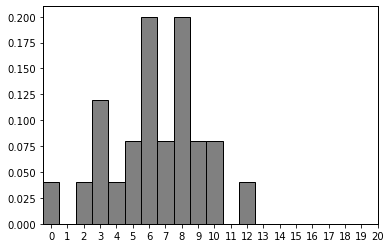

<Figure size 432x288 with 0 Axes>

In [126]:
sublibaryNumL=np.arange(1,14)

for i in sublibaryNumL:
    DFindex=str(i) #convert to string to reference column names in dataframe
    tempDF=observedFreqsDF.loc[observedFreqsDF[DFindex] >= 0] #selects only for rows that are floats, NaN from positions within other sublibraries are excluded
    posL=tempDF.index.tolist() #get list of all positions in this sublibrary
    countsL=tempDF[DFindex].tolist() #get list of counts for all positions
    
    print(stats.skew(countsL, axis=0, bias=True, nan_policy='propagate'))
    
    #make histogram
    plt.hist(countsL, bins = np.arange(-0.5,20.5,1), color='gray',edgecolor='k', density=True)
    plt.xlim(-0.5,20)
    plt.xticks(np.arange(0,21,1))
    plt.show()
    plt.clf()


    

# for j,k in sublibFreqD.items():
#     freqL=list(k.values())
#     print(stats.skew(freqL, axis=0, bias=True, nan_policy='propagate'))
#     plt.hist(freqL, bins = np.arange(-0.5,20.5,1), color='gray',edgecolor='k')
#     plt.xlim(-0.5,20)
#     plt.xticks(np.arange(0,21,1))
#     plt.show()
#     plt.clf()

## 